# Building a Brain Tumor Classifier using Deep Learning

### Introduction
Deep learning has paved its roots much more decisively in our daily lives. As a society, we experience miniature lifestyle changes, such as self-driving cars, Google Assistant, Netflix recommendations, spam email detection, and many more. Similarly, deep learning has also evolved in healthcare, where we use deep learning models to detect brain tumors using MRI scans, detect covid using lung x-rays, etc.
A brain tumor is a serious disease with more than 1 million cases recorded annually.

A magnetic resonance imaging (MRI) scan is used if a person has a brain tumor. A brain tumor can belong to any category, and an MRI examination of these millions of people to decide whether a person is suffering from this disease or not, and if so, what is his category, can be a difficult task. This is where deep learning models play a vital role, where it can decide whether a patient has a brain tumor or not just by providing an MRI image of the patient’s brain using neural networks.

We will build a brain tumor classifier using CNN (Convolutional Neural Networks), widely used for image classification for its high accuracy. The programming language we will use is python.

### Overview of dataset
We are using a brain tumor image classifier dataset that has 7022 images of human brain MRI images divided into training and testing sets also they are classified into 4 classes:

- Glioma  
- Meningioma  
- No tumor 
- Pituitary.

# Dataset Link

Link: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

These images have pixel sizes 512 x 512, and every image has its label fixed with it.


Let’s move forward and import essential libraries that will help us classify these images.

### Importing the libraries

For the starting part, where we will explore the dataset first and preprocess it using the Image data generator, we will be importing Tensorflow. In TensorFlow, we will be using the Keras library.

In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as Imgen

### How to split the custom image dataset into training, testing, and validation folders for Machine Learning Projects

Link: https://python.plainenglish.io/how-to-split-the-custom-image-dataset-into-training-testing-and-validation-folders-for-machine-6b33c7b02c75

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
data_dir = 'Testing'  # Change this to your dataset directory
val_dir = 'val_dir'  # Change this to your desired validation set directory
test_dir = 'test_dir'  # Change this to your desired test set directory

# Create directories if they do not exist
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all subdirectories (classes)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    
    # Split into validation and test sets (e.g., 50% validation, 50% test)
    val_images, test_images = train_test_split(images, test_size=0.5, random_state=42)
    
    # Create class subdirectories in validation and test directories
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    # Move files to validation set
    for img in val_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(val_dir, cls, img)
        shutil.move(src, dst)
    
    # Move files to test set
    for img in test_images:
        src = os.path.join(cls_path, img)
        dst = os.path.join(test_dir, cls, img)
        shutil.move(src, dst)

print("Dataset split into validation and test sets successfully.")


Dataset split into validation and test sets successfully.


### Image Augmentation
When we use any image dataset for training our model, sometimes it may not give us accurate results as the images in it may require some preprocessing like zooming, increasing brightness, changing the grayscale value, etc. Just like the binary data requires some data cleaning and preprocessing, the image dataset to needs it. For this, the Image data generator from the Keras library is used.

It generates batches of tensor image data with real-time data augmentation, e.g., resizing all the images, and adjusting their height and width, so that the input image data is uniform.

1. Args rescale: (rescaling factor). Defaults to None. Otherwise, we can multiply the data by the value provided.

2. Shear_range: Shear Intensity (Shear angle in a counter-clockwise direction in degrees)

3. Zoom_range: Range for random zoom

4. Height_shift_range:  fraction of total height, if < 1

5. Width_shift_range: fraction of total width, if < 1

6. Fill_mode:Default is ‘nearest’. Points outside the boundaries of the input are filled according to the given mode.

7. Validation_split: Fraction of images reserved for validation (strictly between 0 and 1).

In [3]:
#Augmenting the training dataset
traingen = Imgen(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = "nearest",
    validation_split = 0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255
    rescale = 1./255
    )

Now, we will take the path to a directory & generate batches of augmented data.

In [4]:
trainds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("val_dir",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("test_dir",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4857 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Found 656 images belonging to 4 classes.


Some arguments used here are,

1. Target_size: Tuple of integers (height, width), defaults to (512, 512). The dimensions to which all images are found will be resized.

2. Seed: Optional random seed for shuffling and transformations.

3. Batch_size: Size of the batches of data (default: 32).

4. Subset : Subset of data (“training” or “validation”).

5. Shuffle: Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.

This step segregates our preprocessed image dataset into training, validation, and testing sets where the ratio of splitting of our image dataset into training and validation sets is 80% – 20%, where the validation dataset contains 20% of the training dataset. And in terms of the testing set, the dataset itself is divided into training and testing set folders, so there is no need to explicitly divide the testing set.

The validation dataset is important while building a deep learning model to corroborate our model performance during training. This process is important to tune our model later based on its performance.

To identify the classes of our dataset,

In [5]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

Therefore, our journey to build our first ever brain tumor classifier using deep learning is moving ahead successfully. We have our data augmented, divided into training, validation, and testing sets, and also we have identified the four classes of the image dataset.

Now let’s visualize our images so we can look at how image augmentation has performed, and also, we will also use our classes to identify what type of brain tumor we are looking for.

In [6]:
x,y = next(trainds)                          #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])              #size of the plot
    for i in range(16):                      #16 images
        plt.subplot(4,4,i+1)                 #4 by 4 plot
        plt.imshow(x[i])                     #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])  # Class of the image will be it's title
        plt.axis("off")
    plt.show()                               #shows the figure or plot

Now we will plot our images by calling our defined function.

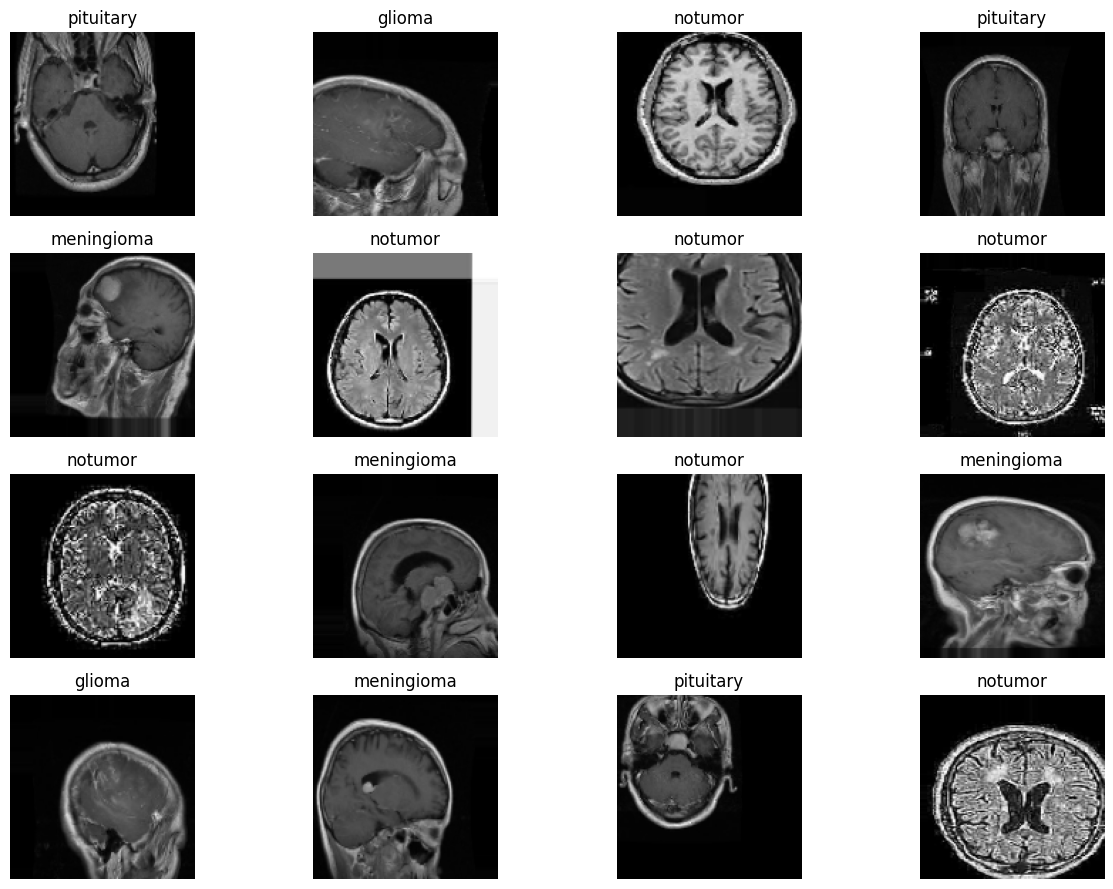

In [7]:
#Call the plotImages function

plotImages(x,y)

#It will give us the output like this,

Now, the most important step of this project is to start creating a Deep Learning model using Convolutional Neural Networks.

### Building the Deep Learning model

Neural networks are widely used for almost every deep learning project because of their accuracy and ability to detect data without being explicitly programmed. Different kinds of neural networks are used according to the project’s needs; for example, we will use Artificial Neural Networks (ANN) for integer data. CNN is widely used for classifying image data. The main advantage of CNN is that it automatically detects important features in any image without human supervision. This may be why CNN would be a perfect solution to computer vision and image classification problems. Feature extraction is therefore vital for CNNs.

The performed feature extraction consists of three basic operations:

1. Filter an image for a particular feature (convolution)
2. Detect that feature within the filtered image (ReLU)
3. Condense the image to enhance the features (maximum pooling)

Let’s discuss every operation of CNN.

1. Convolution

The convolutional layer performs the filtering step. The weights that ConvNet learns during training are primarily contained in its convolutional layers. These scales are called cores. The core works by scanning the image and producing a weighted pixel sum.



![](34389conv.png)

Different types of kernels produce different features for every image.

![](74556conv.png)

### 2.Activation Function

This is the most important part of a neural network. The activation function decides whether a particular neuron will fire or not based on the input it receives and passes it on to the next layer. The Rectified Linear Unit or ReLU is the most common activation function used due to its simple implementation and overcoming many other obstacles caused by other activation functions such as the Sigmoid.

We also used the Softmax activation function in the model because it is used to classify multi-class datasets.

3. Maxpooling

Max Pooling is a convolutional process where the kernel extracts the maximum value of the area it covers. Like max pooling, we can use average pooling. The ReLU (Detect) function in the function map ends up with a lot of “dead space”, we would like to condense the function map to keep only the most useful part of the function itself.

To build the model, let’s first import the necessary libraries that we would need to create the model.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.optimizers import Adam

Below is The CNN model.

In [10]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

Some basic terminologies used here are,

Dropout layer: This layer is used on any hidden layer but cannot be used on an output layer. This layer is mainly used to prevent the overfitting of our model.

Flatten layer: This layer is mainly used to convert multidimensional input to unidimensional output.

Dense layer: A simple layer of neurons where each neural network is interconnected.

Since our output will consist of any of the four classes glioma, meningioma, no tumor, and pituitary, we gave the output layer four units.

Following is the architecture of the created model.

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0

Compile the model created with the help of the following parameters,

In [12]:
cnn.compile(loss = "categorical_crossentropy",
            optimizer = "Adam", metrics = ["accuracy"])

So the loss function we have chosen here is the categorical cross-entropy. A loss function is essential when developing a deep learning model to measure the difference between predicted and actual output so that neural networks can adjust their weights to increase their accuracy. Categorical cross-entropy is used when an image is to be classified among many classes.

The optimizer in neural networks is mostly used to adjust the weights of the neural networks and improve the learning speed of the model to reduce the losses. Here, Adam is the most commonly used optimizer.

Let’s fit our data to the CNN model we created.

In [13]:
history = cnn.fit(trainds,validation_data=valds,epochs=10, batch_size=16, verbose=1)

Epoch 1/10
304/304 [==============================] - 299s 110ms/step - loss: 0.9295 - accuracy: 0.5876 - val_loss: 1.4198 - val_accuracy: 0.5625
Epoch 2/10
304/304 [==============================] - 13s 43ms/step - loss: 0.7554 - accuracy: 0.6809 - val_loss: 1.0264 - val_accuracy: 0.6458
Epoch 3/10
304/304 [==============================] - 13s 43ms/step - loss: 0.6659 - accuracy: 0.7363 - val_loss: 1.1242 - val_accuracy: 0.5833
Epoch 4/10
304/304 [==============================] - 13s 43ms/step - loss: 0.6473 - accuracy: 0.7365 - val_loss: 1.1410 - val_accuracy: 0.5521
Epoch 5/10
304/304 [==============================] - 13s 43ms/step - loss: 0.5999 - accuracy: 0.7544 - val_loss: 0.9959 - val_accuracy: 0.5938
Epoch 6/10
304/304 [==============================] - 13s 43ms/step - loss: 0.5871 - accuracy: 0.7638 - val_loss: 0.9773 - val_accuracy: 0.5521
Epoch 7/10
304/304 [==============================] - 13s 43ms/step - loss: 0.5509 - accuracy: 0.7774 - val_loss: 1.0707 - val_accurac

As we can see, our proposed CNN model has given us an accuracy of 98% on training data! And on validation data, we have received more than 86% accuracy. Now let’s evaluate this model on the testing dataset.

In [14]:
cnn.evaluate(testds)

41/41 [==============================] - 3s 74ms/step - loss: 1.1949 - accuracy: 0.6189


[1.1949317455291748, 0.6189024448394775]

As we can see, our proposed CNN model performed quite well on the test data. When fitting the model, we declared the training data as ‘trainds’ in the code above and kept the epochs as 10, which means our model trains the neural network with the training data ten times and set Verbose to 1 to see fitting the model after one epoch in real-time.

Now let’s visualize some of our results.

### Visualization using Deep Learning

We will plot a graph between our accuracy achieved and the number of epochs to see how our training and validation accuracy increases.

<Figure size 640x480 with 0 Axes>

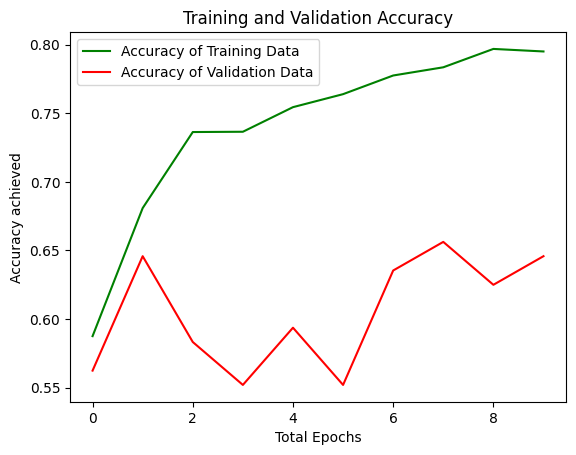

<Figure size 640x480 with 0 Axes>

In [15]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

Through this graph, we can assume that our model is pretty consistent with training and validation data as our graph is pretty much visible to us.

Now we will classify some sample images with the help of the model that we created.

### Prediction using Deep Learning

For predicting some sample images with the help of our model, we will first need to import that image, perform normalization on that image, and convert it into an array for smooth prediction.

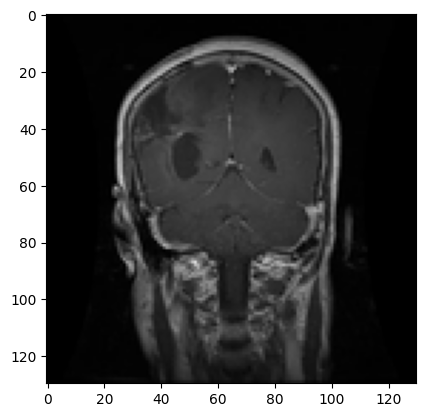

In [21]:
# from matplotlib.pyplot import imshow
# from PIL import Image, ImageOps
# data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
# image = Image.open("D:\MICRO AI PROJECT\Brain Tumor Detection  Project\Brain Tumor Project Update\Tr-gl_0010.jpg")
# size = (130, 130)
# image = ImageOps.fit(image, size, Image.ANTIALIAS) # Yeh problem horhae hai
# image_array = np.asarray(image)
# display(image)
# normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# data[0] = normalized_image_array

import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps

data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image_path = "Tr-gl_0010.jpg"
image = Image.open(image_path)
size = (130, 130)
image = ImageOps.fit(image, size, Image.LANCZOS)  # Use Image.LANCZOS instead of Image.ANTIALIAS
image_array = np.asarray(image)
imshow(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

Here we have used libraries like matplotlib for imshow(), which helps us display the image, and Python Imaging Library (PIL), which deals with all types of image operations. From PIL, we use ImageOps, which is a module for multiple imaging and image preprocessing operations.

Now we will predict the class of the above image, i.e., tumor type, using our CNN model.

In [22]:
prediction = cnn.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 438ms/step
[[0. 0. 1. 0.]]
2


It is confirmed that our above-normalized image belongs to the second class (starting from zero), i.e. No tumor, which is the right answer. Let’s print this answer.

In [23]:
print("There's {:.2f} percent probability that the person has No Tumor".format(prediction[0][2]*100))

There's 100.00 percent probability that the person has No Tumor


In this way, we can firmly say that our CNN model effectively predicts any type of brain tumor data with maximum accuracy. You can use any brain tumor dataset above for the given model architecture.

### Conclusion
As we see how technology has greatly influenced our lifestyle and culture. Using technology to improve our people is the best it can do. We all have the vision to improve this technology every step of the way and make it useful for everyday life. Using Deep Learning in healthcare is the best option. Like the above Deep Learning model for brain tumor classification, we can use these models in every sector by applying certain modifications.

We learned how to use Tensorflow and Keras for this deep learning model and different techniques to help improve our accuracy and also did data visualizations. Try to use the above techniques to develop any deep learning model and successfully apply them to any given an example.